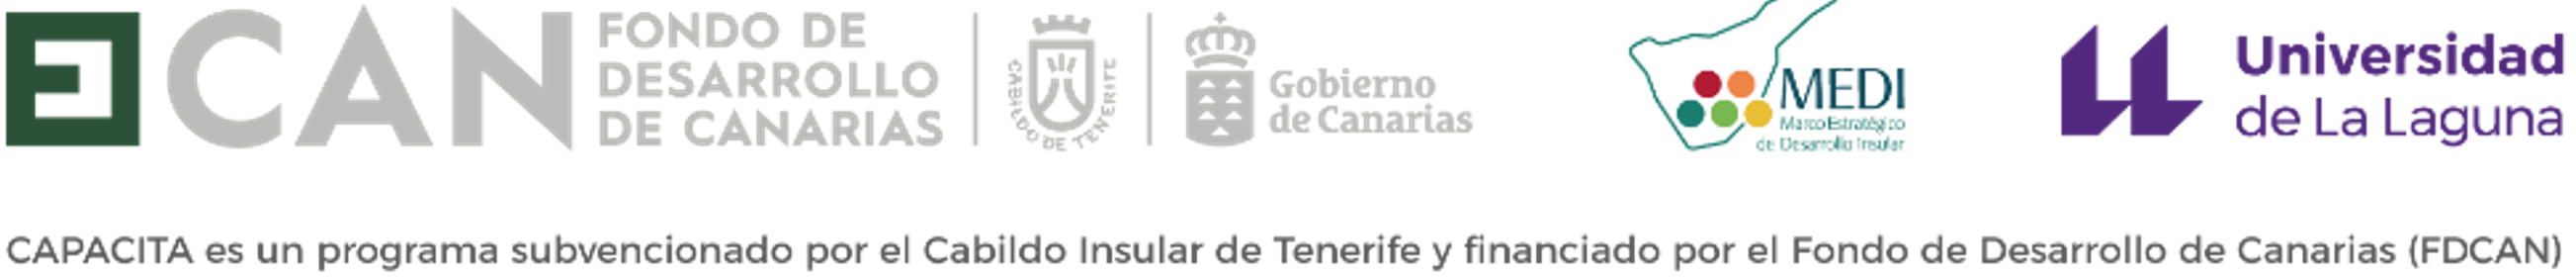

## Clustering en Python

En esta práctica probaremos diversos códigos y librerías de Python con el objetivo de aplicar distintas metodologías de clustering en dicho lenguaje de programación.

#### Networkx

Como ya sabemos, Networkx se trata de una librería para estudiar la estructura, dinámica y funciones de redes complejas como las que hemos visto a lo largo del curso.

Para poder utilizar esta librería, en nuestra primera celda lo que hacemos es importar dicha librería además de su módulo de comunidades.

In [5]:
import networkx as nx
from networkx.algorithms.community import *

#### Dataset

El conjunto de datos aplicado será el club de Karate ya aplicado en otras prácticas, como vemos a continuación, hacemos referencia a la librería NetworkX para cargarlo, esto es gracias a que este grafo ya forma parte de los ejemplos que proporciona, en otro caso, tendríamos que cargarlo nosotros de alguna fuente externa al paquete.

Nodes:  34
Edges:  78


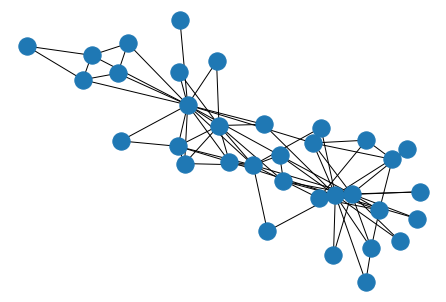

In [6]:
g = nx.karate_club_graph()
print("Nodes: ", len(g.nodes))
print("Edges: ", len(g.edges))
nx.draw(g)

La siguiente celda es una función que trabaja con los los nodos y los clusters creados por los algoritmos de clustering que trabajaremos. Esta función crea un array el cual define un color para cada cluster. 

In [7]:
def createColoursFromNetworkX(g, clusters):
  newClusters = {}
  
  for node in g:
    for clusterID in range(len(clusters)):
      if node in clusters[clusterID]:
        newClusters[node] = clusterID
        
  colours = [newClusters[node] for node in newClusters]
  
  return colours

#### Girvan-Newman

El primero de los algoritmos que aplicaremos se trata del método de Girvan-Newman, se trata de un método jerárquico divisivo el cual detecta comunidades eliminando progresivamente las aristas del gráfico original. La selección de este algoritmo para eliminar las aristas está basada en eliminar el que tenga una mayor centralidad de intermediación. En cada paso, el grafo se irá rompiendo en pedazos definiendo la estructura final.

In [8]:
communities_generator = girvan_newman(g)

top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)

clusters = sorted(map(sorted, next_level_communities))
clusters

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
 [9]]

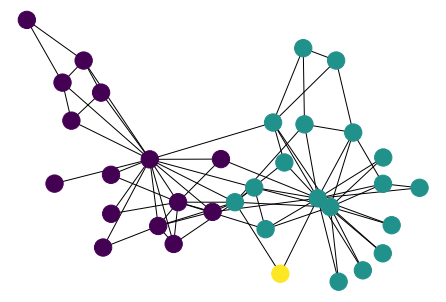

In [9]:
colours = createColoursFromNetworkX(g, clusters)
nx.draw(g, node_color=colours)

#### Cliques

Otra de las funcionalidades que tiene esta herramienta es proporcionarnos los cliques existentes en el grafo.


In [10]:
cliques = list(nx.find_cliques(g))
cliques

[[0, 1, 17],
 [0, 1, 2, 3, 13],
 [0, 1, 2, 3, 7],
 [0, 1, 19],
 [0, 1, 21],
 [0, 4, 10],
 [0, 4, 6],
 [0, 5, 10],
 [0, 5, 6],
 [0, 8, 2],
 [0, 11],
 [0, 12, 3],
 [0, 31],
 [1, 30],
 [2, 32, 8],
 [2, 9],
 [2, 27],
 [2, 28],
 [5, 16, 6],
 [33, 32, 8, 30],
 [33, 32, 14],
 [33, 32, 15],
 [33, 32, 18],
 [33, 32, 20],
 [33, 32, 22],
 [33, 32, 23, 29],
 [33, 32, 31],
 [33, 9],
 [33, 13],
 [33, 19],
 [33, 26, 29],
 [33, 27, 23],
 [33, 28, 31],
 [24, 25, 31],
 [24, 27],
 [25, 23]]

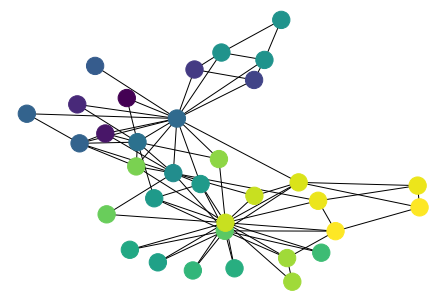

In [11]:
colours = createColoursFromNetworkX(g, cliques)
nx.draw(g, node_color=colours)

#### Asyn Fluid

El siguiente algoritmo se trata de la adaptación de fluidos asíncronos, el cual esta basado en la idea de que los fluidos interactúan en un entorno expandiéndose y empujándose. El algoritmo estable las comunidades definidas e itera una a una en los vértices con un orden aleatorio en función de su propia comunidad y de las vecinas hasta converger.

In [12]:
number_of_communities = 2

fluidCommunities = list(asyn_fluidc(g, number_of_communities, max_iter=100, seed=None))
fluidCommunities

[{0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]

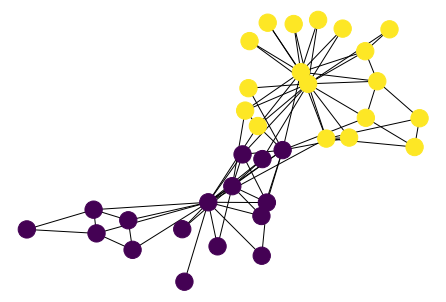

In [13]:
colours = createColoursFromNetworkX(g, fluidCommunities)
nx.draw(g, node_color=colours)

#### Matriz de adyacencia

El siguiente paso que haremos es obtener la matriz de adyacencia del grafo para aplicarla en los siguientes algoritmos. 

In [14]:
adj = nx.adjacency_matrix(g)
adj = adj.todense();
adj

matrix([[0, 1, 1, ..., 1, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 1, 0],
        ...,
        [1, 0, 0, ..., 0, 1, 1],
        [0, 0, 1, ..., 1, 0, 1],
        [0, 0, 0, ..., 1, 1, 0]], dtype=int64)

### Scikit-learn

A partir de aquí usaremos otra herramienta la cual se basa en técnicas de Machine Learning en Python, la cual tiene una gran variedad de módulos desde análisis predictivo hasta clasificación, pasando por clustering que es lo que nos interesa a nosotros.

In [15]:
from sklearn import cluster

De igual forma, creamos una función para crear nuestro array de colores y poder representar los clusters en el grafo.

In [16]:
def createColoursFromSklearn(g, clusters):
  colours = [clusters[node] for node in g]
  
  return colours

#### K-means

Tenemos el método k-means el cual a partir de las observaciones se dividen las observaciones en _k_ comunidades según la distancia media más cercana (centros de grupos o centroides).

In [17]:
number_of_clusters = 2

kmeans = cluster.KMeans(n_clusters=number_of_clusters, n_init=200)
kmeans.fit(adj)

resultKMeans = list(kmeans.labels_)
resultKMeans

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

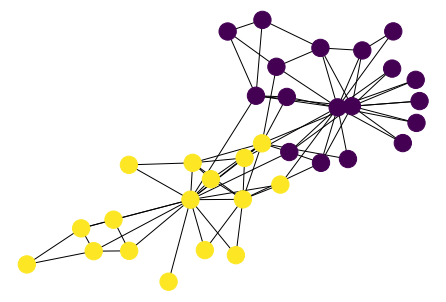

In [18]:
colours = createColoursFromSklearn(g, resultKMeans)
nx.draw(g, node_color=colours)

#### Agglomerative Clustering

Por último, ejecutamos el clustering jerárquico aglomeratico, el cual trata de crear un dendograma pero en este caso dividiendo el árbol por la parte de clusters que especifiquemos.

In [19]:
number_of_clusters = 4

agglomerative = cluster.AgglomerativeClustering(n_clusters=number_of_clusters, linkage="ward")
agglomerative.fit(adj)

resultAgglomerative = list(agglomerative.labels_)
resultAgglomerative

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


[3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2]

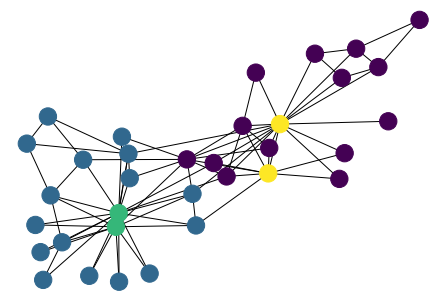

In [20]:
colours = createColoursFromSklearn(g, resultAgglomerative)
nx.draw(g, node_color=colours)